<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Data Aggregation

Put together all teams data in a single dataset.

In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
SAVING_PATH = "/Users/lgmoneda/Documents/datasets/ge_news"
def get_all_files_in_a_folder(team, full=False):
    path = "{}/data/{}".format(SAVING_PATH, team)
    
    files = [f for f in glob.glob(path + "**/*.csv", recursive=True)]
    
    if not full:
        files = [file.replace(path + "/", "") for file in files]
        files = [file.replace(".csv", "") for file in files]
    
    return files

def aggregate_all_saved_sections_from_zones_files(team):
    files = get_all_files_in_a_folder(team, full=True)
    
    all_dataframes = []
    for file in files:
        all_dataframes.append(pd.read_csv(file))
        
    return add_team_column(pd.concat(all_dataframes), team)

def add_team_column(data, team):
    data["club"] = team
    return data

In [3]:
teams = ["athletico-pr", "atletico-go", "atletico-mg",
         "bahia", "bragantino", "botafogo", "ceara",
         "corinthians", "coritiba", "flamengo", "fluminense", 
         "fortaleza", "goias", "gremio", "internacional", 
         "palmeiras", "santos", "sao-paulo", "sport", "vasco", "cruzeiro"]
    
teams_dataframes = [aggregate_all_saved_sections_from_zones_files(team) for team in teams]
data = pd.concat(teams_dataframes)
data["article_time"] = data["date"].apply(lambda x: x.strip().split(" ")[1] if not pd.isnull(x) else x)
data["article_date"] = data["date"].apply(lambda x: x.strip().split(" ")[0] if not pd.isnull(x) else x)


In [4]:
### 96778
data.shape

(102291, 7)

In [5]:
data["year-month"] = data["article_date"].apply(lambda x: x.split("/")[-1] + "-" + x.split("/")[1])

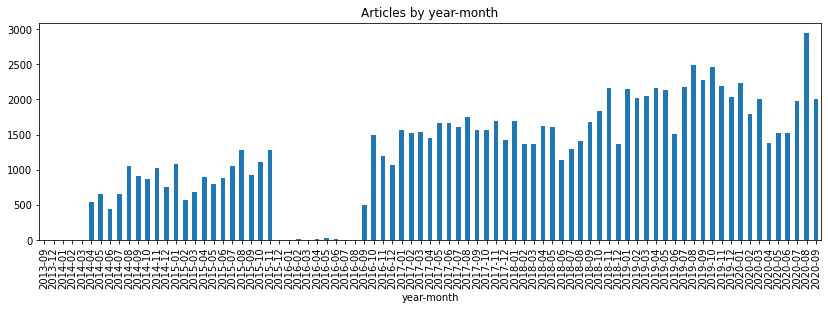

In [6]:
data.groupby("year-month")["title"].count().sort_index().plot(kind="bar",
                                                             figsize=(14, 4))
plt.title("Articles by year-month")
plt.show()

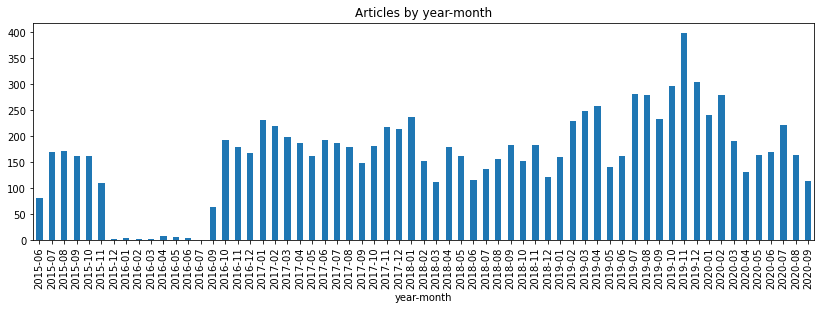

In [7]:
data[data["club"] == "flamengo"].groupby("year-month")["title"].count().sort_index().plot(kind="bar",
                                                             figsize=(14, 4))
plt.title("Articles by year-month")
plt.show()

In [8]:
# data[data["club"] == "internacional"].groupby("year-month")["title"].count().sort_index().plot(kind="bar",
#                                                              figsize=(14, 4))
# plt.title("Articles by year-month")
# plt.show()

In [9]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', -1)  # or 199

In [10]:
# data[(data["club"] == "internacional") | (data["club"] == "flamengo")].groupby(["year-month", "club"]).count()

In [11]:
agg = data.groupby("title")["club"].count() 
agg[agg > 1].sort_values(ascending=False)

title
Internacional lidera com o segundo menor aproveitamento da história dos pontos corridos                                  19
Favoritismos #10: veja quais equipes têm mais chances de vencer na rodada do Brasileiro                                  19
CBF divulga calendário do futebol brasileiro para 2021: competições não param durante Copa América                       19
Número de expulsões em 2020 aumenta 126% com relação ao Brasileirão do ano passado                                       19
Com estádios vazios, explode o número de cartões para membros de comissão técnica no Brasileirão                         19
Favoritismos #11: veja quais equipes têm mais chances de vencer na rodada do Brasileiro                                  19
Favoritismos #5: veja quais equipes têm mais chances de vencer na rodada do Brasileiro                                   19
Favoritismos #6: veja quais equipes têm mais chances de vencer na rodada do Brasileiro                                   19
Fa

In [12]:
data.groupby("club")["title"].count()

club
athletico-pr      7040
atletico-go       1632
atletico-mg       4282
bahia             2738
botafogo          6356
bragantino         964
ceara             2370
corinthians       9416
coritiba          2064
cruzeiro          3900
flamengo         10338
fluminense        6263
fortaleza         2761
goias             2749
gremio            6170
internacional     7931
palmeiras         6898
santos            5227
sao-paulo         7876
sport             2629
vasco             2687
Name: title, dtype: int64

In [13]:
data = data.drop(columns=["date"]).rename(columns={"article_date": "date", 
                                                   "article_time": "time", 
                                                   "article_link": "link",
                                                   "article_text": "text"})

In [14]:
data = data[~pd.isnull(data["text"])]

In [15]:
data.shape

(102290, 7)

In [16]:
data.head()

,title,text,link,club,time,date,year-month
0,Conmebol divulga tabela detalhada da pré e da ...,Argentinos são destaques no caminho dos brasi...,https://globoesporte.globo.com/futebol/liberta...,athletico-pr,10h04,22/12/2017,2017-12
0,"Com assistência, Demethryus recebe elogios no ...",O meia Demethryus conseguiu aproveitar bem a ...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr,08h00,11/02/2018,2018-02
0,"Alô, cartoleiros! Atlético-PR passa limpo cont...","O atacante Marcelo Cirino, desfalque já nos ú...",https://globoesporte.globo.com/pr/futebol/time...,athletico-pr,22h17,13/09/2018,2018-09
0,Athletico mantém o projeto de torcida única e ...,O Athletico também divulgou o preço dos ingre...,https://globoesporte.globo.com/pr/futebol/time...,athletico-pr,14h54,16/01/2019,2019-01
0,Atlético-PR peca na pontaria e chega a 11 jogo...,"O volante Bruno Guimarães finalizou uma vez, ...",https://globoesporte.globo.com/pr/futebol/time...,athletico-pr,08h30,21/10/2018,2018-10


In [19]:
data[["date", "time", "title", "text", "link", "club"]].to_csv("/Users/lgmoneda/Documents/datasets/ge_news/data/ge_news.csv", index=False)